In [2]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import random

# Import Dataset

In [3]:
data = pd.read_excel(r"Weekly Data.xlsx")

# Statistic Description

In [4]:
statistic_description = data.loc[:, ["price", "mrk_cap", "job count"]].describe()
#statistic_description.to_excel('sd.xlsx')

## Data Visualiation

## 1 Line Chart

There are two obvious declines in both stock price and market capital. The first one is at the beginning of 2020, which may be the result of the pandemic of COVID-19. The other is around  2022, which indicates the economic recession.

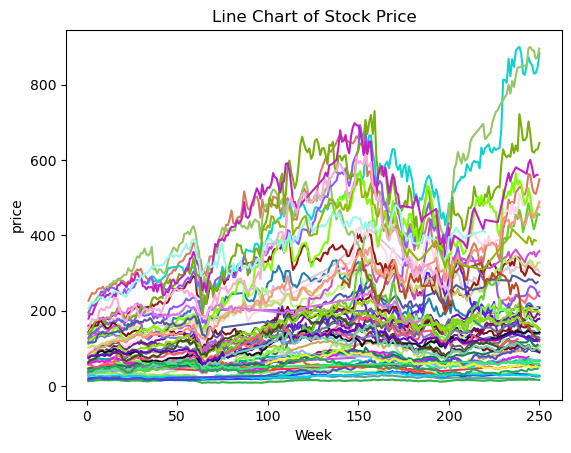

In [5]:
data = data.sort_values(['Ticker', 'Week'])
for ticker in data['Ticker'].unique():
    product_data = data[data['Ticker'] == ticker]    
    random_color = (random.random(), random.random(), random.random())    
    plt.plot(product_data['Week'], product_data['price'], label=ticker, color=random_color)
plt.xlabel('Week')
plt.ylabel('price')
plt.title("Line Chart of Stock Price")
plt.show()

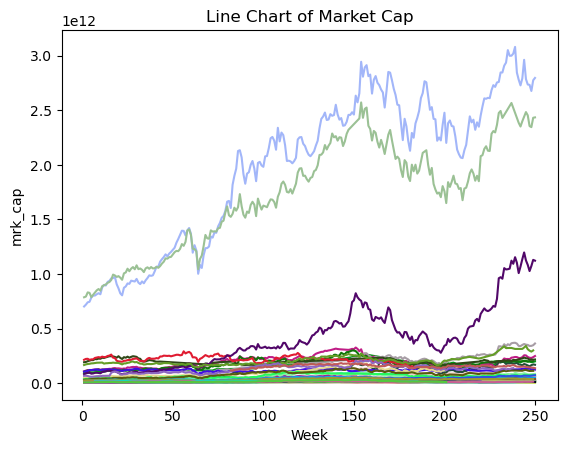

In [5]:
data = data.sort_values(['Ticker', 'Week'])
for ticker in data['Ticker'].unique():
    product_data = data[data['Ticker'] == ticker]    
    random_color = (random.random(), random.random(), random.random())    
    plt.plot(product_data['Week'], product_data['mrk_cap'], label=ticker, color=random_color)
plt.xlabel('Week')
plt.ylabel('mrk_cap')
plt.title("Line Chart of Market Cap")
plt.show()

The line cartof the job listing number also shows two decreases. One is around the year of 2020. And the other decline was started from 2022 till now. This is also an evidence of economic recession.

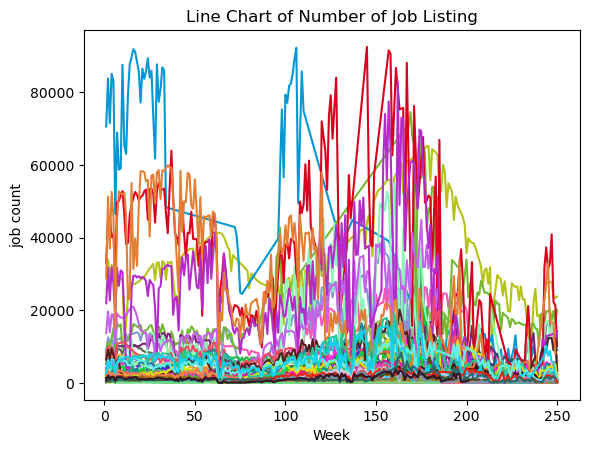

In [6]:
data = data.sort_values(['Ticker', 'Week'])

for ticker in data['Ticker'].unique():
    product_data = data[data['Ticker'] == ticker]
    
    random_color = (random.random(), random.random(), random.random())
    
    plt.plot(product_data['Week'], product_data['job count'], label=ticker, color=random_color)

plt.xlabel('Week')
plt.ylabel('job count')
plt.title("Line Chart of Number of Job Listing")
plt.show()

## 2 Scatter Plot

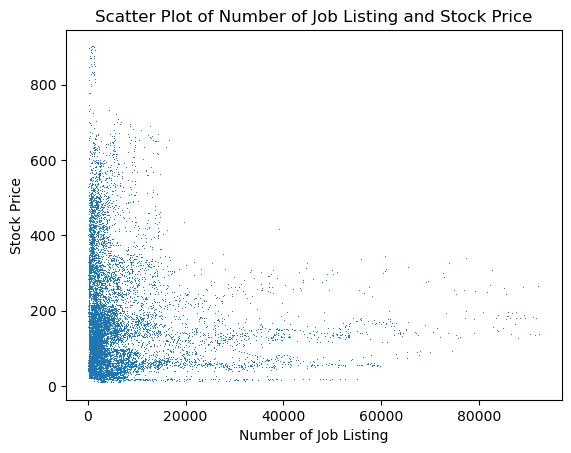

In [7]:
plt.plot('job count', 'price', data=data, linestyle='none', marker=',')
plt.title("Scatter Plot of Number of Job Listing and Stock Price")
plt.xlabel("Number of Job Listing")
plt.ylabel("Stock Price")
plt.savefig('Scatter Plot of Number of Job Listing and Stock Price.png')
plt.show()

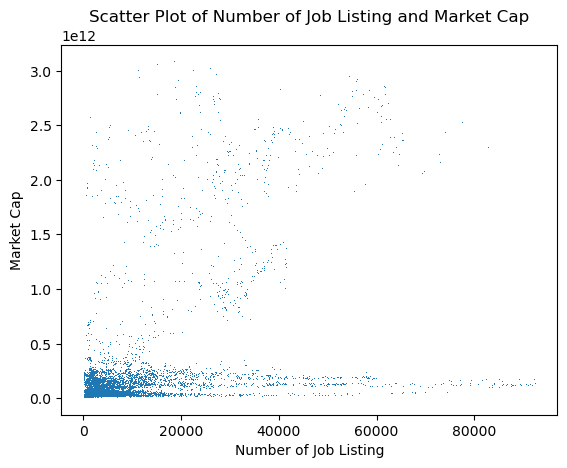

In [8]:
plt.plot('job count', 'mrk_cap', data=data, linestyle='none', marker=',', markersize = 1.3)
plt.title("Scatter Plot of Number of Job Listing and Market Cap")
plt.xlabel("Number of Job Listing")
plt.ylabel("Market Cap")
plt.savefig('Scatter Plot of Number of Job Listing and Market Cap.png')
plt.show()

In [6]:
data

,DATES,Week,Ticker,Posted_year,Posted_week,company industry,price,mrk_cap,job count,Consultant,...,sp_4q,mc_1q,mc_2q,mc_3q,mc_4q,sp_rate_1q,sp_rate_2q,sp_rate_3q,sp_rate_4q,sp_rate
0,2019-01-04,1,AAPL,2019,1,Technology Hardware & Equipment,37.0650,7.035527e+11,29400,282,...,74.3575,9.289102e+11,9.396775e+11,1.025899e+12,1.321560e+12,0.036443,0.031384,0.036745,0.025988,0.000000
1,2019-01-11,2,AAPL,2019,2,Technology Hardware & Equipment,38.0725,7.203017e+11,34002,318,...,77.5825,9.377277e+11,9.353985e+11,1.067476e+12,1.360495e+12,0.009448,-0.004564,0.039727,0.042457,0.026819
2,2019-01-18,3,AAPL,2019,3,Technology Hardware & Equipment,39.2050,7.417277e+11,28635,261,...,79.6825,9.612570e+11,9.321318e+11,1.068379e+12,1.397321e+12,0.024782,-0.003498,0.000846,0.026708,0.029312
3,2019-01-25,4,AAPL,2019,4,Technology Hardware & Equipment,39.4400,7.461737e+11,32503,286,...,79.5775,9.633317e+11,9.558273e+11,1.114339e+12,1.395480e+12,0.002156,0.025103,0.042119,-0.001319,0.005976
4,2019-02-01,5,AAPL,2019,5,Technology Hardware & Equipment,41.6300,7.851884e+11,31528,282,...,77.3775,9.742776e+11,9.220031e+11,1.136676e+12,1.354255e+12,0.035817,-0.018069,0.036788,-0.028035,0.054041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11956,2022-09-30,196,ZBRA,2022,39,Electronic & Electrical Equipment,262.0100,1.356948e+10,2492,12,...,236.5300,1.323840e+10,1.634671e+10,1.521464e+10,1.214306e+10,0.032462,0.096559,0.112587,0.040464,-0.022754
11957,2022-10-07,197,ZBRA,2022,40,Electronic & Electrical Equipment,266.6800,1.381134e+10,420,3,...,223.8500,1.411662e+10,1.543479e+10,1.518326e+10,1.149209e+10,0.064231,-0.057403,-0.002064,-0.055099,0.017667
11958,2022-10-14,198,ZBRA,2022,41,Electronic & Electrical Equipment,255.6100,1.323803e+10,400,3,...,206.9200,1.516367e+10,1.557975e+10,1.590637e+10,1.062293e+10,0.071550,0.009348,0.046526,-0.078644,-0.042397
11959,2022-10-21,199,ZBRA,2022,42,Electronic & Electrical Equipment,263.0400,1.362283e+10,400,2,...,0.0000,1.533560e+10,1.479943e+10,1.576134e+10,0.000000e+00,0.011274,-0.051384,-0.009160,0.000000,0.028653


# Preprocessing

### Whether the number of job listing is increased

In [7]:
data['increase'] = 0
for x in data["Ticker"].unique():
    data_x = data.loc[data["Ticker"] == x]
    for index, row in data_x.iterrows():
        if index > 0 :
            if data.loc[index-1, "Ticker"] == x:
                j = data.loc[index, 'job count']
                j_1 = data.loc[index-1, 'job count']
                if j > j_1:
                    data.loc[index, "increase"] = "+"
                else:
                    data.loc[index, "increase"] = "-"
            else:
                data.loc[index, "increase"] = "None"
        else:
            data.loc[index, "increase"] = "None"

In [8]:
data.head()

,DATES,Week,Ticker,Posted_year,Posted_week,company industry,price,mrk_cap,job count,Consultant,...,mc_1q,mc_2q,mc_3q,mc_4q,sp_rate_1q,sp_rate_2q,sp_rate_3q,sp_rate_4q,sp_rate,increase
0,2019-01-04,1,AAPL,2019,1,Technology Hardware & Equipment,37.0650,7.035527e+11,29400,282,...,9.289102e+11,9.396775e+11,1.025899e+12,1.321560e+12,0.036443,0.031384,0.036745,0.025988,0.000000,None
1,2019-01-11,2,AAPL,2019,2,Technology Hardware & Equipment,38.0725,7.203017e+11,34002,318,...,9.377277e+11,9.353985e+11,1.067476e+12,1.360495e+12,0.009448,-0.004564,0.039727,0.042457,0.026819,+
2,2019-01-18,3,AAPL,2019,3,Technology Hardware & Equipment,39.2050,7.417277e+11,28635,261,...,9.612570e+11,9.321318e+11,1.068379e+12,1.397321e+12,0.024782,-0.003498,0.000846,0.026708,0.029312,-
3,2019-01-25,4,AAPL,2019,4,Technology Hardware & Equipment,39.4400,7.461737e+11,32503,286,...,9.633317e+11,9.558273e+11,1.114339e+12,1.395480e+12,0.002156,0.025103,0.042119,-0.001319,0.005976,+
4,2019-02-01,5,AAPL,2019,5,Technology Hardware & Equipment,41.6300,7.851884e+11,31528,282,...,9.742776e+11,9.220031e+11,1.136676e+12,1.354255e+12,0.035817,-0.018069,0.036788,-0.028035,0.054041,-


## Scale

In [9]:
data_mm = data.copy()
data_mm.iloc[:, 6:-1] = preprocessing.MinMaxScaler().fit_transform(data_mm.iloc[:, 6:-1])
data_mm

,DATES,Week,Ticker,Posted_year,Posted_week,company industry,price,mrk_cap,job count,Consultant,...,mc_1q,mc_2q,mc_3q,mc_4q,sp_rate_1q,sp_rate_2q,sp_rate_3q,sp_rate_4q,sp_rate,increase
0,2019-01-04,1,AAPL,2019,1,Technology Hardware & Equipment,0.031908,0.227524,0.317515,0.029625,...,0.301579,0.305075,0.333068,0.429057,0.570626,0.567598,0.575275,0.559870,0.659525,None
1,2019-01-11,2,AAPL,2019,2,Technology Hardware & Equipment,0.033038,0.232968,0.367386,0.033407,...,0.304442,0.303686,0.346566,0.441697,0.532250,0.516117,0.579547,0.583457,0.686503,+
2,2019-01-18,3,AAPL,2019,3,Technology Hardware & Equipment,0.034309,0.239932,0.309225,0.027419,...,0.312081,0.302625,0.346859,0.453653,0.554050,0.517643,0.523865,0.560902,0.689010,-
3,2019-01-25,4,AAPL,2019,4,Technology Hardware & Equipment,0.034573,0.241377,0.351142,0.030045,...,0.312755,0.310318,0.361781,0.453055,0.521884,0.558603,0.582972,0.520765,0.665537,+
4,2019-02-01,5,AAPL,2019,5,Technology Hardware & Equipment,0.037030,0.254058,0.340576,0.029625,...,0.316308,0.299337,0.369032,0.439671,0.569737,0.496776,0.575337,0.482503,0.713885,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11956,2022-09-30,196,ZBRA,2022,39,Electronic & Electrical Equipment,0.284326,0.003256,0.025921,0.001261,...,0.004298,0.005307,0.004940,0.003942,0.564968,0.660937,0.683889,0.580603,0.636638,-
11957,2022-10-07,197,ZBRA,2022,40,Electronic & Electrical Equipment,0.289566,0.003334,0.003468,0.000315,...,0.004583,0.005011,0.004929,0.003731,0.610131,0.440446,0.519697,0.443745,0.677296,-
11958,2022-10-14,198,ZBRA,2022,41,Electronic & Electrical Equipment,0.277144,0.003148,0.003251,0.000315,...,0.004923,0.005058,0.005164,0.003449,0.620535,0.536040,0.589284,0.410026,0.616879,-
11959,2022-10-21,199,ZBRA,2022,42,Electronic & Electrical Equipment,0.285482,0.003273,0.003251,0.000210,...,0.004979,0.004805,0.005117,0.000000,0.534847,0.449066,0.509535,0.522653,0.688348,-


In [10]:
data_mm.sort_values(by=['DATES'], inplace=True)
data_mm

,DATES,Week,Ticker,Posted_year,Posted_week,company industry,price,mrk_cap,job count,Consultant,...,mc_1q,mc_2q,mc_3q,mc_4q,sp_rate_1q,sp_rate_2q,sp_rate_3q,sp_rate_4q,sp_rate,increase
0,2019-01-04,1,AAPL,2019,1,Technology Hardware & Equipment,0.031908,0.227524,0.317515,0.029625,...,0.301579,0.305075,0.333068,0.429057,0.570626,0.567598,0.575275,0.559870,0.659525,None
6395,2019-01-04,1,KEYS,2019,1,Electronic & Electrical Equipment,0.059832,0.002624,0.017046,0.000105,...,0.005459,0.005588,0.005882,0.006233,0.554876,0.548882,0.526960,0.503801,0.659525,None
6615,2019-01-04,1,KLAC,2019,1,Technology Hardware & Equipment,0.092767,0.003388,0.022096,0.000000,...,0.006607,0.006186,0.008289,0.009174,0.576333,0.519014,0.546224,0.527138,0.659525,None
6807,2019-01-04,1,LRCX,2019,1,Technology Hardware & Equipment,0.145238,0.005809,0.003771,0.000000,...,0.009668,0.008939,0.010969,0.013880,0.641542,0.490268,0.542372,0.527472,0.659525,None
7055,2019-01-04,1,MCHP,2019,1,Technology Hardware & Equipment,0.029035,0.004150,0.013990,0.000000,...,0.007149,0.006893,0.007245,0.008165,0.680001,0.563845,0.560581,0.519391,0.659525,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,2023-10-13,250,PTC,2023,41,Software & Computer Services,0.150624,0.004363,0.002731,0.005253,...,0.000000,0.000000,0.000000,0.000000,0.518819,0.522653,0.522653,0.522653,0.677427,-
9855,2023-10-13,250,SEDG,2023,41,Alternative Energy,0.124703,0.001047,0.002644,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.518819,0.522653,0.522653,0.522653,0.624772,-
5228,2023-10-13,250,HPE,2023,41,Software & Computer Services,0.008809,0.005717,0.054931,0.036348,...,0.000000,0.000000,0.000000,0.000000,0.518819,0.522653,0.522653,0.522653,0.638386,-
9051,2023-10-13,250,ON,2023,41,Technology Hardware & Equipment,0.090343,0.011348,0.005191,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.518819,0.522653,0.522653,0.522653,0.639526,-


# Models

In [11]:
prediction_accuracy = pd.DataFrame(index = [0, 1, 2, 3, 4], columns = ["LR", "Forest", "SVM", 'Tree', 'NN'])

## 0 quarter
### X: Job Listing Number, Job Listing Number of Every Category
### Y: mrk_cap

In [12]:
data_mm.sort_values(by=['DATES'], inplace=True)
train, test = train_test_split(data_mm, test_size = 0.2, shuffle=False)

## train data
y_train = np.array(train.loc[:, ["mrk_cap"]]).reshape(-1, 1)
x_train = train.iloc[:, 8:30]

## test data
y_test = np.array(test.loc[:, ["mrk_cap"]]).reshape(-1, 1)
x_test = test.iloc[:, 8:30]

In [13]:
len(x_test)

2393

### Linear Regression

Mean squared error: 0.01
Variance score: 0.43
Mean absolute error: 0.04
         LR Forest  SVM Tree   NN
0  0.427846    NaN  NaN  NaN  NaN
1       NaN    NaN  NaN  NaN  NaN
2       NaN    NaN  NaN  NaN  NaN
3       NaN    NaN  NaN  NaN  NaN
4       NaN    NaN  NaN  NaN  NaN


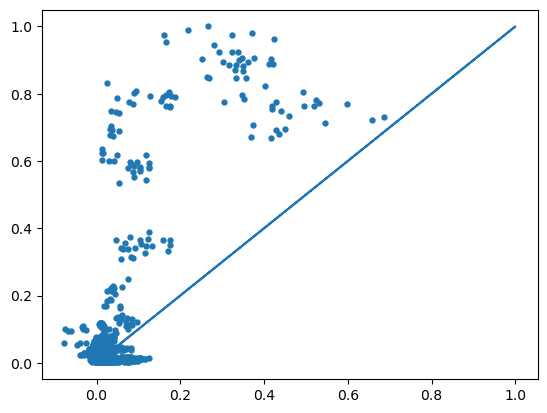

In [14]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["LR"][0] = r2_score(y_test, y_pred)
print(prediction_accuracy)
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Random Forest

e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error: 0.01
Variance score: 0.58
Mean absolute error: 0.03
         LR   Forest  SVM Tree   NN
0  0.427846  0.57975  NaN  NaN  NaN
1       NaN      NaN  NaN  NaN  NaN
2       NaN      NaN  NaN  NaN  NaN
3       NaN      NaN  NaN  NaN  NaN
4       NaN      NaN  NaN  NaN  NaN


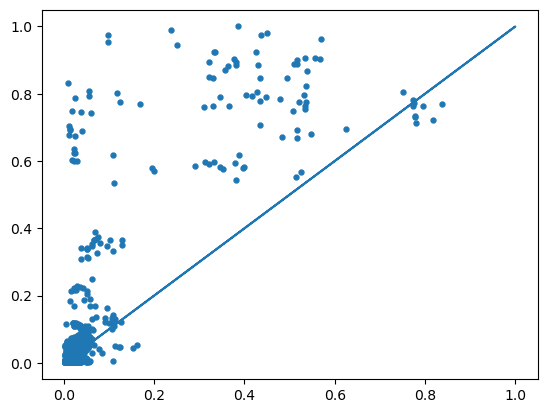

In [15]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Forest"][0] = r2_score(y_test, y_pred)
print(prediction_accuracy)
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### SVM

e:\ANOCADA3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.54
Mean absolute error: 0.07


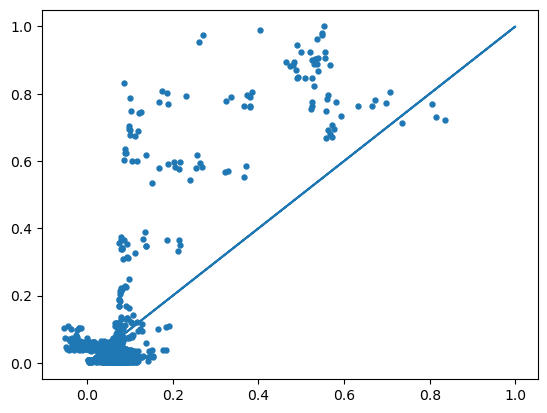

In [16]:
reg = svm.SVR()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["SVM"][0] = r2_score(y_test, y_pred)
prediction_accuracy
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

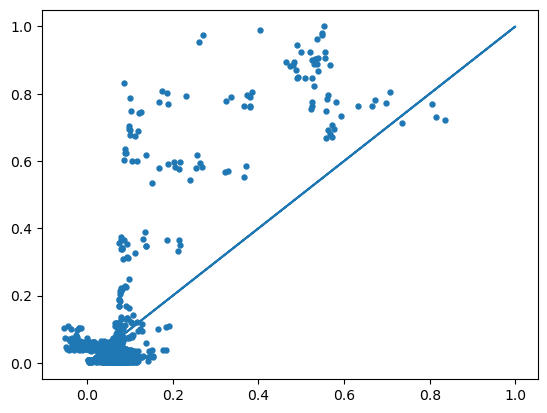

In [17]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Decision Tree

In [18]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Tree"][0] = r2_score(y_test, y_pred)
prediction_accuracy

Mean squared error: 0.01
Variance score: 0.57
Mean absolute error: 0.03


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


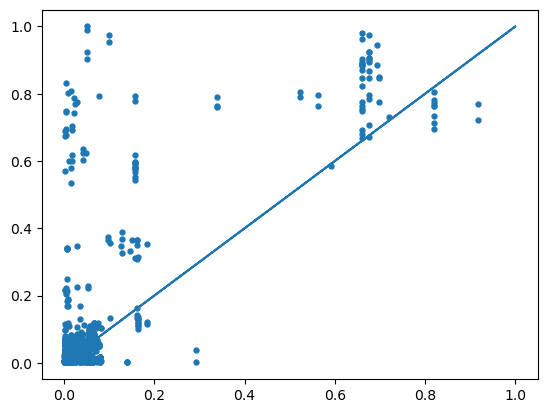

In [19]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

In [20]:
from sklearn.neural_network import MLPRegressor


clf = MLPRegressor(activation = 'tanh',solver='adam', alpha=1e-5,hidden_layer_sizes = (20,5), random_state=1)

clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["NN"][0] = r2_score(y_test, y_pred)
prediction_accuracy

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.47
Mean absolute error: 0.04


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


## 1 quarters
### X: Job Listing Number, Job Listing Number of Every Category
### Y: 1q market_cap

In [21]:
data_mm.sort_values(by=['DATES'], inplace=True)
data_drop = data_mm.loc[data_mm["mc_1q"] != 0]
train, test = train_test_split(data_drop, test_size = 0.2, shuffle=False)

## train data
y_train = np.array(train.loc[:, ["mc_1q"]]).reshape(-1, 1)
x_train = train.iloc[:, 8:30]

## test data
y_test = np.array(test.loc[:, ["mc_1q"]]).reshape(-1, 1)
x_test = test.iloc[:, 8:30]

In [22]:
len(x_test)

2276

In [23]:
data_drop.columns[list(range(9, 30))]

Index(['Consultant', 'Engineer', 'Manager', 'Scientist', 'Specialist',
       'Analyst', 'Lead', 'Intern', 'Advisor', 'Developer', 'Support',
       'Product', 'Operation', 'Customer', 'Sale', 'Technical', 'Marketing',
       'Software', 'Business', 'Hardware', 'Information'],
      dtype='object')

In [24]:
from sklearn.neural_network import MLPRegressor


clf = MLPRegressor(activation = 'tanh',solver='adam', alpha=1e-5,hidden_layer_sizes = (20,5), random_state=1)

clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["NN"][1] = r2_score(y_test, y_pred)
prediction_accuracy

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.45
Mean absolute error: 0.04


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,NaN,NaN,NaN,NaN,0.450611
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


### Linear Regression

In [25]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["LR"][1] = r2_score(y_test, y_pred)
prediction_accuracy

Mean squared error: 0.01
Variance score: 0.43
Mean absolute error: 0.04


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,0.433344,NaN,NaN,NaN,0.450611
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


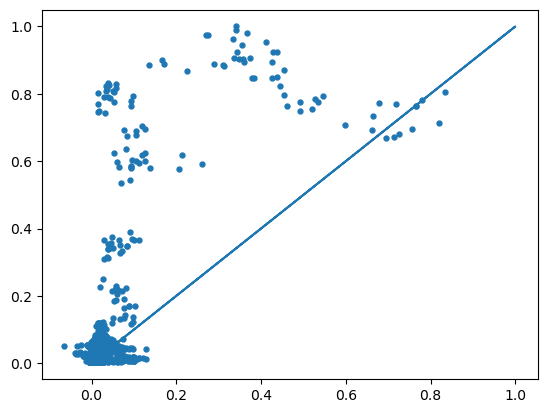

In [26]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Random Forest

In [27]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Forest"][1] = r2_score(y_test, y_pred)
prediction_accuracy

e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error: 0.01
Variance score: 0.43
Mean absolute error: 0.03


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,0.433344,0.426101,NaN,NaN,0.450611
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


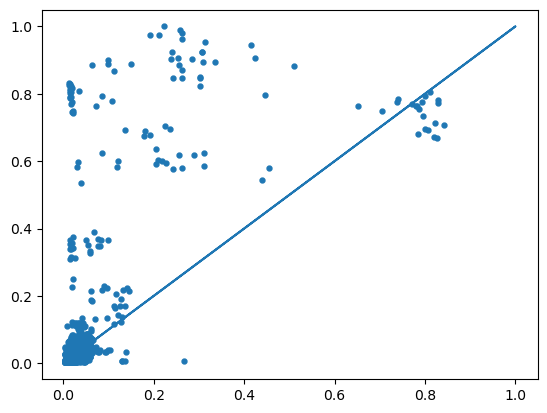

In [28]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### SVM

In [29]:
reg = svm.SVR()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["SVM"][1] = r2_score(y_test, y_pred)
prediction_accuracy

e:\ANOCADA3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.51
Mean absolute error: 0.07


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,0.433344,0.426101,0.509627,NaN,0.450611
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


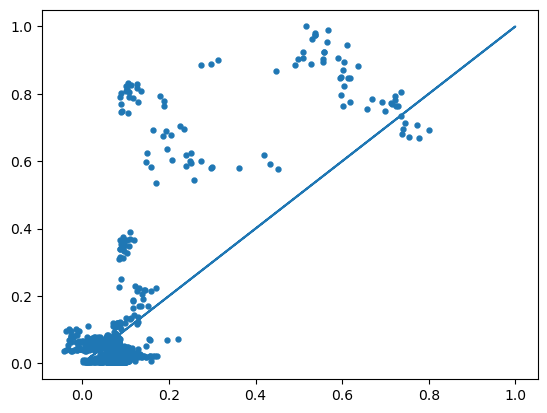

In [30]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Decision Tree

In [31]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Tree"][1] = r2_score(y_test, y_pred)
prediction_accuracy

Mean squared error: 0.02
Variance score: 0.16
Mean absolute error: 0.04


,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,0.433344,0.426101,0.509627,0.164573,0.450611
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


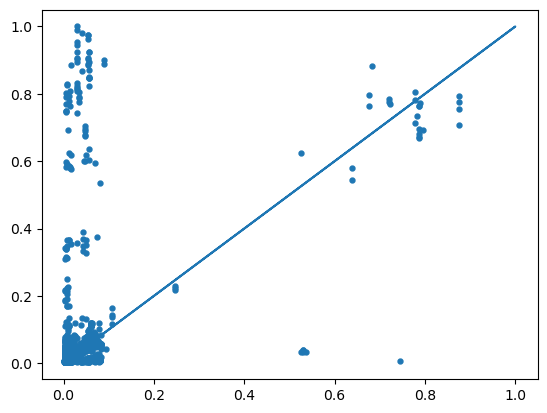

In [32]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

## 2 quarters
### X: Job Listing Number, Job Listing Number of Every Category
### Y: 2 quarter lagged market capital

In [33]:
data_mm.sort_values(by=['DATES'], inplace=True)
data_drop = data_mm.loc[data_mm["mc_2q"] != 0]
train, test = train_test_split(data_drop, test_size = 0.2, shuffle=False)

## train data
y_train = np.array(train.loc[:, ["mc_2q"]]).reshape(-1, 1)
x_train = train.iloc[:, 8:30]

## test data
y_test = np.array(test.loc[:, ["mc_2q"]]).reshape(-1, 1)
x_test = test.iloc[:, 8:30]

In [34]:
len(x_test)

2166

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.53
Mean absolute error: 0.04


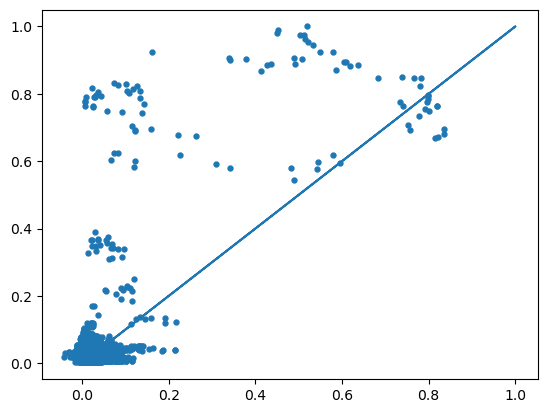

         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2       NaN       NaN       NaN       NaN  0.530658
3       NaN       NaN       NaN       NaN       NaN
4       NaN       NaN       NaN       NaN       NaN


In [35]:
from sklearn.neural_network import MLPRegressor


clf = MLPRegressor(activation = 'tanh',solver='adam', alpha=1e-5,hidden_layer_sizes = (20,5), random_state=1)

clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()
prediction_accuracy["NN"][2] = r2_score(y_test, y_pred)
print(prediction_accuracy)

### Linear Regression

In [36]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["LR"][2] = r2_score(y_test, y_pred)
print(prediction_accuracy)

Mean squared error: 0.01
Variance score: 0.50
Mean absolute error: 0.04
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093       NaN       NaN       NaN  0.530658
3       NaN       NaN       NaN       NaN       NaN
4       NaN       NaN       NaN       NaN       NaN


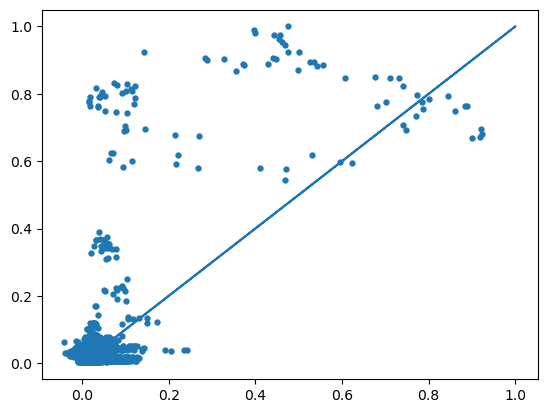

In [37]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Random Forest

In [38]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Forest"][2] = r2_score(y_test, y_pred)
print(prediction_accuracy)

e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error: 0.01
Variance score: 0.56
Mean absolute error: 0.03
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446       NaN       NaN  0.530658
3       NaN       NaN       NaN       NaN       NaN
4       NaN       NaN       NaN       NaN       NaN


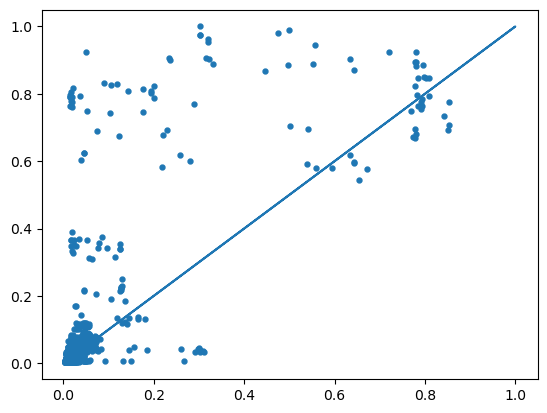

In [39]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### SVM

In [40]:
reg = svm.SVR()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["SVM"][2] = r2_score(y_test, y_pred)
print(prediction_accuracy)

e:\ANOCADA3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.57
Mean absolute error: 0.07
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744       NaN  0.530658
3       NaN       NaN       NaN       NaN       NaN
4       NaN       NaN       NaN       NaN       NaN


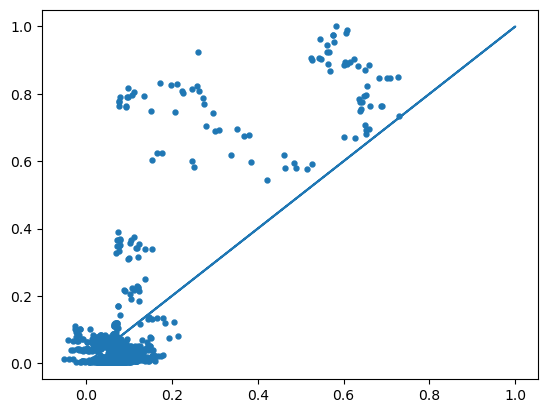

In [46]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Decision Tree

In [41]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Tree"][2] = r2_score(y_test, y_pred)
print(prediction_accuracy)

Mean squared error: 0.02
Variance score: 0.40
Mean absolute error: 0.04
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3       NaN       NaN       NaN       NaN       NaN
4       NaN       NaN       NaN       NaN       NaN


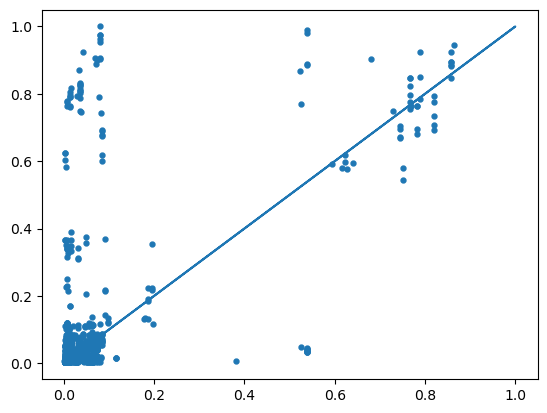

In [48]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

## 3 quarters
### X: Job Listing Number, Job Listing Number of Every Category
### Y: 3 quarter lagged market capital

In [42]:
data_mm.sort_values(by=['DATES'], inplace=True)
data_drop = data_mm.loc[data_mm["mc_3q"] != 0]
train, test = train_test_split(data_drop, test_size = 0.2, shuffle=False)

## train data
y_train = np.array(train.loc[:, ["mc_3q"]]).reshape(-1, 1)
x_train = train.iloc[:, 8:30]

## test data
y_test = np.array(test.loc[:, ["mc_3q"]]).reshape(-1, 1)
x_test = test.iloc[:, 8:30]


In [29]:
len(y_test)

2061

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.66
Mean absolute error: 0.04


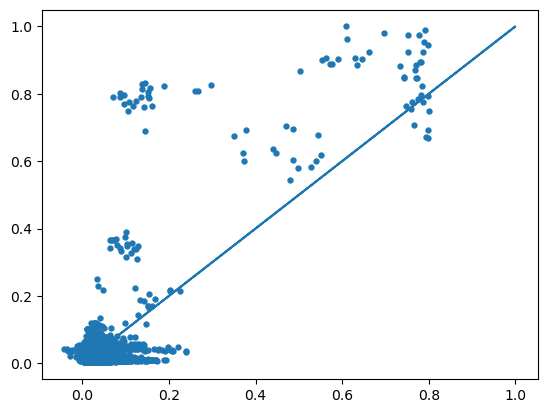

         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3       NaN       NaN       NaN       NaN   0.65986
4       NaN       NaN       NaN       NaN       NaN


In [43]:
from sklearn.neural_network import MLPRegressor


clf = MLPRegressor(activation = 'tanh',solver='adam', alpha=1e-5,hidden_layer_sizes = (20,5), random_state=1)

clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()
prediction_accuracy["NN"][3] = r2_score(y_test, y_pred)
print(prediction_accuracy)

### Linear Regression

In [44]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["LR"][3] = r2_score(y_test, y_pred)
print(prediction_accuracy)

Mean squared error: 0.01
Variance score: 0.62
Mean absolute error: 0.04
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012       NaN       NaN       NaN   0.65986
4       NaN       NaN       NaN       NaN       NaN


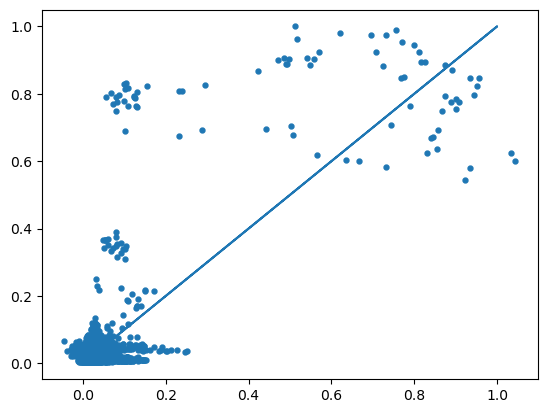

In [32]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Random Forest

In [45]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Forest"][3] = r2_score(y_test, y_pred)
print(prediction_accuracy)

e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error: 0.01
Variance score: 0.66
Mean absolute error: 0.03
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531       NaN       NaN   0.65986
4       NaN       NaN       NaN       NaN       NaN


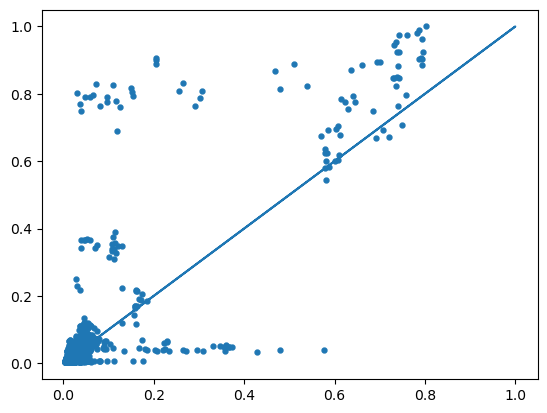

In [55]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### SVM

In [47]:
reg = svm.SVR()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["SVM"][3] = r2_score(y_test, y_pred)
print(prediction_accuracy)

e:\ANOCADA3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.63
Mean absolute error: 0.06
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313       NaN   0.65986
4       NaN       NaN       NaN       NaN       NaN


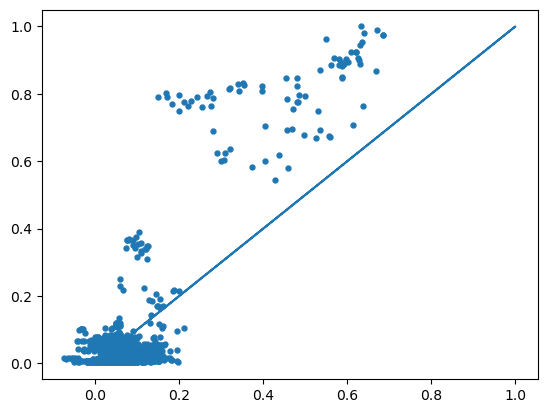

In [57]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Decision Tree

In [48]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Tree"][3] = r2_score(y_test, y_pred)
print(prediction_accuracy)

Mean squared error: 0.01
Variance score: 0.56
Mean absolute error: 0.03
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313  0.563018   0.65986
4       NaN       NaN       NaN       NaN       NaN


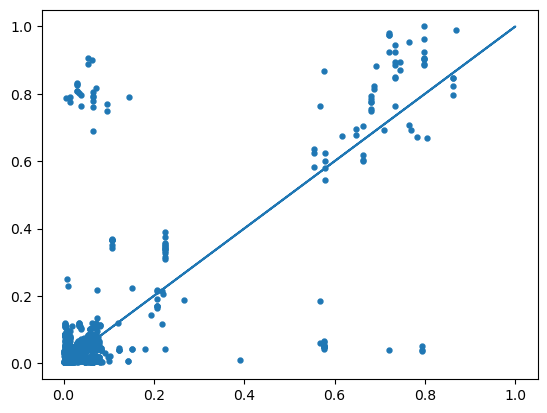

In [59]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

## 4 quarters
### X: Job Listing Number, Job Listing Number of Every Category
### Y: 4 quarter lagged market capital

In [49]:
data_mm.sort_values(by=['DATES'], inplace=True)
data_drop = data_mm.loc[data_mm["mc_4q"] != 0]
train, test = train_test_split(data_drop, test_size = 0.2, shuffle=False)

## train data
y_train = np.array(train.loc[:, ["mc_4q"]]).reshape(-1, 1)
x_train = train.iloc[:, 8:30]

## test data
y_test = np.array(test.loc[:, ["mc_4q"]]).reshape(-1, 1)
x_test = test.iloc[:, 8:30]

In [14]:
len(test)

1937

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.00
Variance score: 0.83
Mean absolute error: 0.03


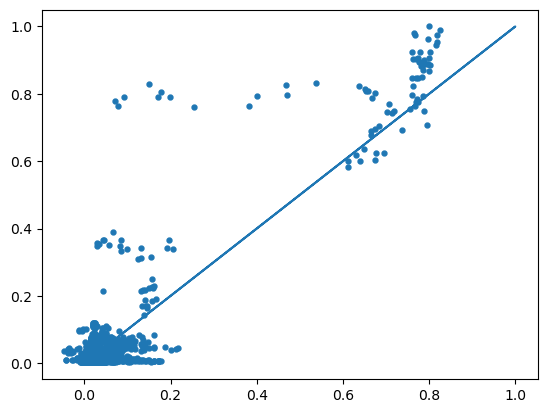

         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313  0.563018   0.65986
4  0.743892  0.795844  0.593472  0.346841  0.827804


In [68]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(activation = 'relu',solver='adam', alpha=1e-5,hidden_layer_sizes = (40, 10), random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()
prediction_accuracy["NN"][4] = r2_score(y_test, y_pred)
print(prediction_accuracy)


### Linear Regression

In [51]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["LR"][4] = r2_score(y_test, y_pred)
print(prediction_accuracy)

Mean squared error: 0.01
Variance score: 0.74
Mean absolute error: 0.04
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313  0.563018   0.65986
4  0.743892       NaN       NaN       NaN  0.748078


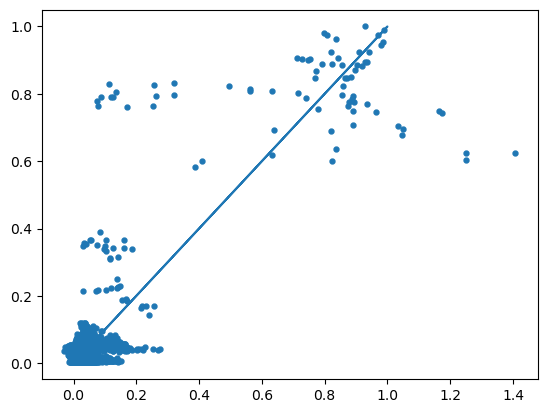

In [64]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Random Forest

In [69]:

reg = RandomForestRegressor(n_estimators = 100, random_state = 0, max_features="log2")
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Forest"][4] = r2_score(y_test, y_pred)
print(prediction_accuracy)


e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean squared error: 0.00
Variance score: 0.80
Mean absolute error: 0.03
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313  0.563018   0.65986
4  0.743892  0.799764  0.593472  0.346841  0.827804


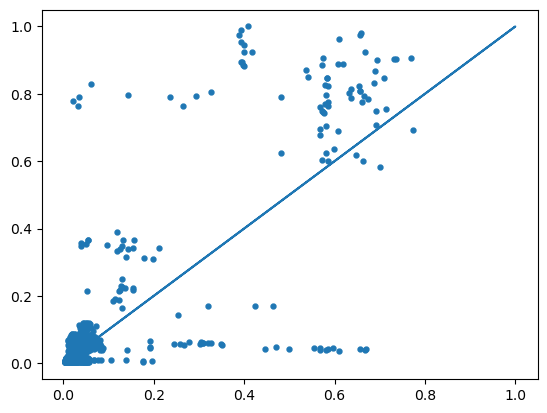

In [19]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### SVM

In [54]:
reg = svm.SVR()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["SVM"][4] = r2_score(y_test, y_pred)
print(prediction_accuracy)

e:\ANOCADA3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.01
Variance score: 0.59
Mean absolute error: 0.06
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313  0.563018   0.65986
4  0.743892  0.793288  0.593472       NaN  0.748078


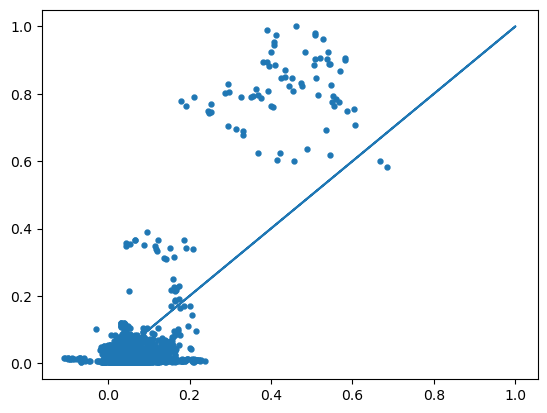

In [17]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

### Decision Tree

In [55]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)  # y_train already has the correct shape
y_pred = reg.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
prediction_accuracy["Tree"][4] = r2_score(y_test, y_pred)
print(prediction_accuracy)

Mean squared error: 0.02
Variance score: 0.35
Mean absolute error: 0.04
         LR    Forest       SVM      Tree        NN
0  0.427846   0.57975  0.538699  0.571599  0.466008
1  0.433344  0.426101  0.509627  0.164573  0.450611
2  0.499093  0.558446    0.5744  0.400353  0.530658
3  0.624012  0.661531  0.634313  0.563018   0.65986
4  0.743892  0.793288  0.593472  0.346841  0.748078


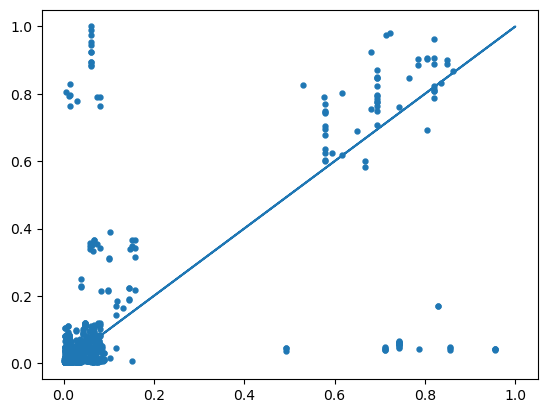

In [27]:
plt.scatter(y_pred, y_test, marker='.', s = 50)
plt.plot(y_test,y_test)
plt.show()

In [70]:
prediction_accuracy

,LR,Forest,SVM,Tree,NN
0,0.427846,0.57975,0.538699,0.571599,0.466008
1,0.433344,0.426101,0.509627,0.164573,0.450611
2,0.499093,0.558446,0.5744,0.400353,0.530658
3,0.624012,0.661531,0.634313,0.563018,0.65986
4,0.743892,0.799764,0.593472,0.346841,0.827804


# Conclusions

1. According to the accuracy, the perofrmance of the Neural Network model is the best after 4 quarters, which is about 0.827804. That means our data is complex and has a lot of non-linear characteristics, which suits non-linear models more. Theparameters of the Neural Network are:
activation = 'relu',solver='adam', alpha=1e-5,hidden_layer_sizes = (40, 10), random_state=1

2. And the performance of our models come best when lagged for 4 quarters, which may imply that the influences of hiring certain jobs on company performance appear quarters later. Because the new workers cannot make significant contributions to the whole company at once, the impact of the new workers only increases after kind of training.

3. According to the report of Linear Regression, we discovered that some categories have more contributions to the overall performance. This includes: "Software", "Hardware", "Information", "Business", "Support", "Specialist" and "Product". And the importance (coefficients) of the independent variables are:

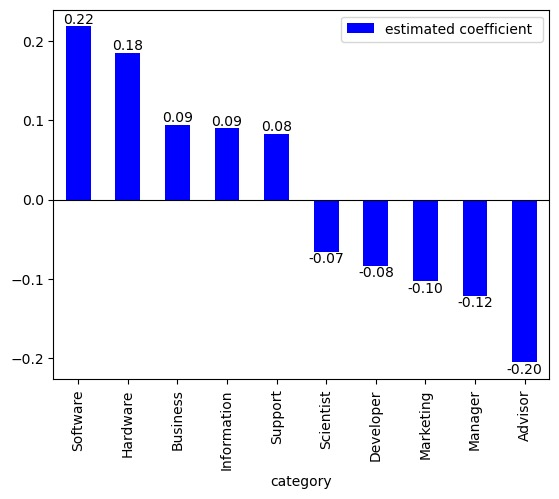

The result can be interpreted as:
1. Software: Involves software development, programming, and system design. A high-performing software team can drive product innovation, improve product quality, and directly impact the company's market competitiveness and profitability.

2. Hardware: Encompasses hardware design, manufacturing, and maintenance. Excellence in the hardware field can enhance product performance, reliability, and technological advancement, contributing to the company's ability to offer competitive hardware products.

3. Information: Involves data management, analysis, and decision support. In the information age, technology companies leveraging and analyzing data can make more informed strategic decisions, enhance efficiency, and bolster innovation capabilities.

4. Business: Encompasses company strategy, marketing, and business development. A high-performing business team can drive strategic development, expand market share, and directly impact the company's profitability and long-term sustainability.

5. Support: Includes customer support, technical support, and related roles. Providing efficient and responsive support services can improve customer satisfaction, increase customer loyalty, and consequently stimulate business growth.